In [37]:
import itertools
from math import sqrt
import multiprocessing as mp
from multiprocessing import Pool
#mp.set_start_method('spawn')

import matplotlib
from matplotlib import pyplot as plt

import numpy as np

font = {'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]=10,10
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-whitegrid')

In [38]:
def plot_k_E(kx, ky, E0, a, t):
    Ek = np.round(-2*t*(np.cos(kx/a) + np.cos(ky/a)),2)
    if Ek == E0:
        return kx, ky

1372
1800
4596
1804
1376


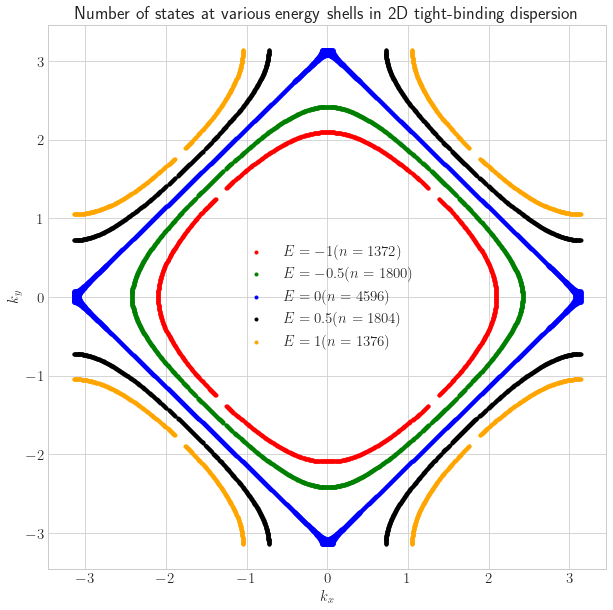

In [41]:
a = 1
L = 1000
dk = 2*np.pi/L
k_edge = np.pi/a
K_range = np.arange(-k_edge,k_edge+dk,dk)
#x, y = np.meshgrid(K_range, K_range)
#plt.scatter(x, y, marker='.', color='g')
t = 1
E0 = 0
colors = ['r', 'g', 'b', 'black', 'orange']
for E0 in [-t, -t/2, 0 ,t/2, t]:
    col = colors[int(E0*2+2*t)]
    data = itertools.product(K_range, K_range, [np.round(E0,2)], [a], [t])
    kx = []
    ky = []
    for outp in Pool(processes=30).starmap(plot_k_E, data):
        if outp == None:
            continue
        kx.append(outp[0])
        ky.append(outp[1])
    print (len(kx))
    plt.scatter(kx, ky, marker='.', color=col, label=r"$E={} (n={})$".format(E0, len(kx)))

plt.title(r"Number of states at various energy shells in 2D tight-binding dispersion")
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
plt.legend()
plt.show()